In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Peter, Mrs. Catherine (Catherine Rizk)",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
#checking for NaN entries
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Data Visualisation**

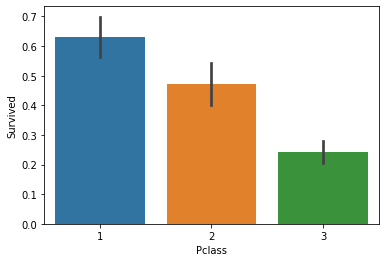

In [10]:

#pclass
sns.barplot(x = 'Pclass', y = 'Survived', data=train)

In [11]:
print('percentage of Pclass=1 survived:', train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1]*100)

print('percentage of Pclass=2 survived:', train['Survived'][train['Pclass'] == 2].value_counts(normalize=True)[1]*100)

print('percentage of Pclass=3 survived:', train['Survived'][train['Pclass'] == 3].value_counts(normalize=True)[1]*100)

percentage of Pclass=1 survived: 62.96296296296296
percentage of Pclass=2 survived: 47.28260869565217
percentage of Pclass=3 survived: 24.236252545824847


In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


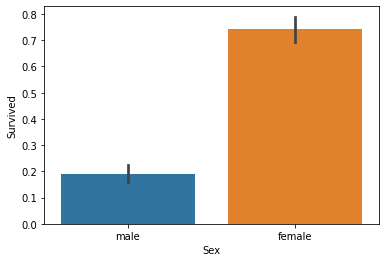

In [13]:
#sex
sns.barplot(x = 'Sex', y = 'Survived', data=train)

In [14]:

print('Percentage of female survivors:',train['Survived'][train['Sex'] == 'female'].value_counts(normalize = True)[1]*100)

print('Percentage of male survivors:',train['Survived'][train['Sex'] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of female survivors: 74.20382165605095
Percentage of male survivors: 18.890814558058924


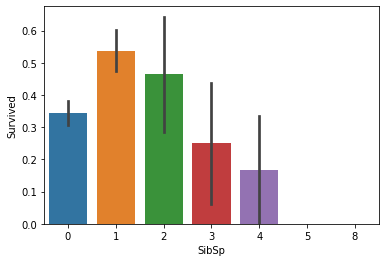

In [15]:

#SibSp

sns.barplot(x = 'SibSp', y = 'Survived', data = train)

In [17]:
print("Percentage of SibSp = 0 suvived:",train['Survived'][train['SibSp']==0].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 1 suvived:",train['Survived'][train['SibSp']==1].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 2 suvived:",train['Survived'][train['SibSp']==2].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 3 suvived:",train['Survived'][train['SibSp']==3].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 4 suvived:",train['Survived'][train['SibSp']==4].value_counts(normalize=True)[1]*100)

Percentage of SibSp = 0 suvived: 34.53947368421053
Percentage of SibSp = 1 suvived: 53.588516746411486
Percentage of SibSp = 2 suvived: 46.42857142857143
Percentage of SibSp = 3 suvived: 25.0
Percentage of SibSp = 4 suvived: 16.666666666666664


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


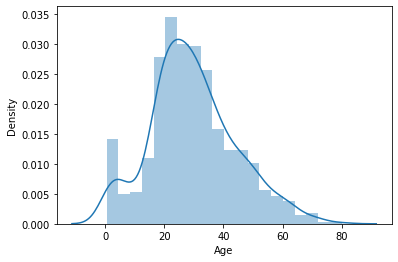

In [18]:

#age

sns.distplot(train['Age'].dropna())

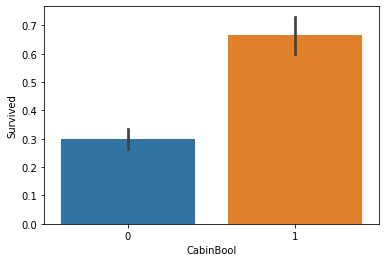

In [19]:
#cabin

train['CabinBool'] = train['Cabin'].notnull().astype('int')
test['CabinBool'] = test['Cabin'].notnull().astype('int')

sns.barplot(x='CabinBool', y='Survived', data=train )

In [20]:
print('CabinBool = 1 who survived:',train['Survived'][train['CabinBool']==1].value_counts(normalize=True)[1]*100)

print('CabinBool = 0 who survived:',train['Survived'][train['CabinBool']==0].value_counts(normalize=True)[1]*100)

CabinBool = 1 who survived: 66.66666666666666
CabinBool = 0 who survived: 29.985443959243085


In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
train.drop(['Ticket'], axis = 1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

Filling in the missing values for the Embarked variable based on the majority 

In [25]:
print("Southampton(S):")
southampton = train[train['Embarked']== 'S'].shape[0]
print(southampton)
  
print("Cherbourg(C):")
cherbourg = train[train['Embarked']== 'C'].shape[0]
print(cherbourg)
        
print("Queenstown(Q):")
queenstown = train[train['Embarked']== 'Q'].shape[0]
print(queenstown)

Southampton(S):
644
Cherbourg(C):
168
Queenstown(Q):
77


In [27]:
train = train.fillna({"Embarked":"S"})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0


Prediciting the missing age values from the prefixes given the Name variable

In [28]:
combdataset = [train, test]

for dataset in combdataset:
  dataset['prefix'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)

In [29]:
pd.crosstab(train['prefix'], train['Sex'])

Sex,female,male
prefix,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [31]:
pd.crosstab(test['prefix'], test['Sex'])

Sex,female,male
prefix,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


Grouping the prefix data

In [32]:
for dataset in combdataset:
  dataset['prefix'] = dataset['prefix'].replace(['Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'vague')
  dataset['prefix'] = dataset['prefix'].replace(['Countess','Lady','Sir'],'royalty')
  dataset['prefix'] = dataset['prefix'].replace(['Mlle','Ms'],'Miss')
  dataset['prefix'] = dataset['prefix'].replace('Mme','Mrs')

train[['prefix', 'Survived']].groupby(['prefix'], as_index=False).mean()

,prefix,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,royalty,1.000000
5,vague,0.250000


In [ ]:
#numbering the prefix groups
prefix_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'royalty':5, 'vague':6}
for dataset in combdataset:
  dataset['prefix'] = dataset['prefix'].map(prefix_mapping)
  dataset['prefix'] = dataset['prefix'].fillna(0)

In [34]:
grouped = train.groupby(['Sex','Pclass', 'prefix'])
grouped2 = test.groupby(['Sex','Pclass', 'prefix'])
grouped.Age.median()
grouped2.Age.median()

Sex     Pclass  prefix
female  1       2         32.0
                3         48.0
                6         39.0
        2       2         19.5
                3         29.0
        3       2         22.0
                3         28.0
male    1       1         42.0
                4          9.5
                6         53.0
        2       1         28.0
                4          5.0
                6         35.5
        3       1         25.0
                4          7.0
Name: Age, dtype: float64

In [35]:
train.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))
test.Age = grouped2.Age.apply(lambda x: x.fillna(x.median()))

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinBool,prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,1


In [37]:
sex_mapping = {"male":0,"female":1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinBool,prefix
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S,0,1


In [38]:
train.drop(['Name'], axis = 1, inplace=True)
test.drop(['Name'],axis = 1, inplace=True)
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [ ]:
#mapping the Embarked variable
embarked_mapping = {'S':1,'C':2,'Q':3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [ ]:
#filling in the missing fare values in the test file based on the corresponding pclass variable(mean fare of each class)

for x in range(len(test['Fare'])):
  if pd.isnull(test['Fare'][x]):
    pclass = test['Pclass'][x] 
    test['Fare'][x] = round(train[train['Pclass'] == pclass]['Fare'].mean(), 4)

In [ ]:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

train.drop(['Fare'],axis=1,inplace=True)
test.drop(['Fare'],axis=1,inplace=True)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool,prefix
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,3
2,3,1,3,1,26.0,0,0,7.9250,0,2
3,4,1,1,1,35.0,1,0,53.1000,1,3
4,5,0,3,0,35.0,0,0,8.0500,0,1


In [53]:
test.drop('Embarked', axis = 1, inplace = True)

In [55]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool,prefix
0,892,3,0,34.5,0,0,7.8292,0,1
1,893,3,1,47.0,1,0,7.0000,0,3
2,894,2,0,62.0,0,0,9.6875,0,1
3,895,3,0,27.0,0,0,8.6625,0,1
4,896,3,1,22.0,1,1,12.2875,0,3


In [57]:
#splitting the training data
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train['Survived']
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

85.28


In [61]:
ids = test['PassengerId']
predictions = rfc.predict(test.drop('PassengerId', axis=1))
output = pd.DataFrame({'PassengerId':ids, 'Survived':predictions})
output.to_csv('submission.csv', index=False)

In [63]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>